In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
df=pd.read_csv('cleaned_data.csv')
X_train,X_test,y_train,y_test = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1),df['default payment next month'].values.reshape(-1,1),test_size=0.2)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [3]:
from sklearn.linear_model import LogisticRegression
my_lr=LogisticRegression(C=0.1,solver='liblinear')
my_lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [53]:
y_pred_prob=my_lr.predict_proba(X_test)
y_pred_prob

array([[0.58456302, 0.41543698],
       [0.85519917, 0.14480083],
       [0.69416859, 0.30583141],
       ...,
       [0.69416859, 0.30583141],
       [0.53410035, 0.46589965],
       [0.58456302, 0.41543698]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [55]:
from sklearn import metrics
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred_prob[:,1])


_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

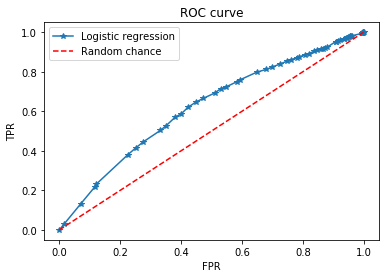

In [56]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [58]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold=precision_recall_curve(y_test,y_pred_prob[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision-Recall Curve')

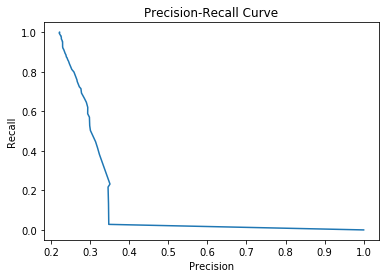

In [62]:
import matplotlib.pyplot as plt
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')


_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [64]:
from sklearn.metrics import auc
area = auc(recall, precision)
area

0.3096292645384706

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

    How is this different, conceptually and quantitatively, from your earlier calculation?
